In [30]:
import pandas as pd
import matplotlib.pyplot as plt
import pyranges as pr

In [7]:
# Kinases dataset (Macarena)
kinases = pd.read_csv('../datasets/kinases.tsv', sep= '\t')
kinases.columns = kinases.columns.str.lower()
kinases = kinases.rename(columns= {'uniprot': 'uniprot_acc', 'cre (start)': 'cre_start', 'cre (end)': 'cre_end', 'kd (start)': 'kd_start', 'kd (end)': 'kd_end'})
kinases.columns = kinases.columns.str.replace(" ", "_")

In [9]:
# Unique proteins
kinases.uniprot_acc.nunique()

280

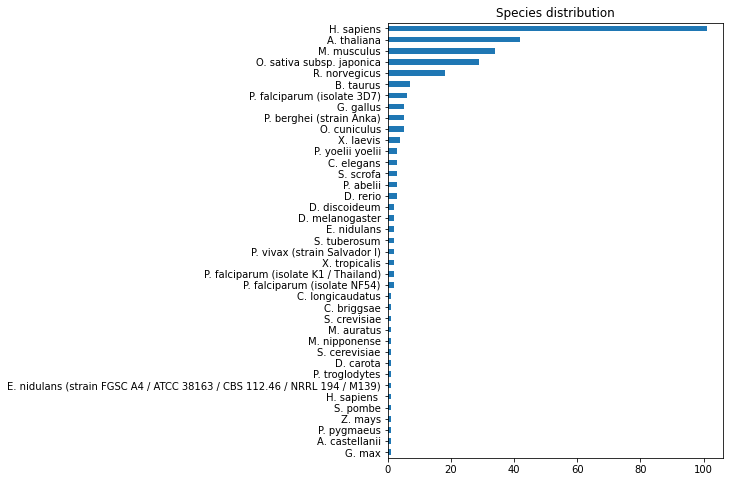

In [10]:
# Species
kinases.organism.value_counts()[::-1].plot(kind='barh', figsize= (6,8))
plt.title("Species distribution")
plt.show()

In [11]:
kinases

,uniprot_acc,organism,cre_start,cre_end,cre_(s_or_d),length,kd_start,kd_end,pdb_id,pdb_res_(å),af,status
0,A0A2I0BVG8,P. falciparum (isolate NF54),346,353,no,NaN,56,325,no,no,AF-A0A2I0BVG8-F1,new
1,A0A509AFG4,P. berghei (strain Anka),385,393,no,NaN,110,365,no,no,AF-A0A509AFG4-F1,new
2,A0A509AHB6,P. berghei (strain Anka),345,352,no,NaN,57,324,no,no,AF-A0A509AHB6-F1,new
3,A0A509AKL0,P. berghei (strain Anka),1,33,no,NaN,545,802,no,no,AF-A0A509AKL0-F1,new
4,A0A509AQE6,P. berghei (strain Anka),394,402,no,NaN,118,372,no,no,AF-A0A509AQE6-F1,new
...,...,...,...,...,...,...,...,...,...,...,...,...
297,Q9ZSA4,A. thaliana,295,325,no,NaN,28,290,no,no,AF-Q9ZSA4-F1,new
298,Q9ZUZ2,A. thaliana,409,439,no,NaN,143,405,no,no,AF-Q9ZUZ2-F1,new
299,Q9ZV15,A. thaliana,398,428,no,NaN,134,392,no,no,AF-Q9ZV15-F1,new
300,W0LYS5,M. nipponense,287,327,no,NaN,31,287,no,no,AF-W0LYS5-F1,new


In [12]:
kinases[['uniprot_acc', 'kd_start',	'kd_end']].drop_duplicates()

,uniprot_acc,kd_start,kd_end
0,A0A2I0BVG8,56,325
1,A0A509AFG4,110,365
2,A0A509AHB6,57,324
3,A0A509AKL0,545,802
4,A0A509AQE6,118,372
...,...,...,...
297,Q9ZSA4,28,290
298,Q9ZUZ2,143,405
299,Q9ZV15,134,392
300,W0LYS5,31,287


SIFT data (mapping uniprot - pdb): ftp://ftp.ebi.ac.uk/pub/databases/msd/sifts/flatfiles/csv/

In [13]:
# some chains might be named as "NA", for python to not interpret them as nan, use: keep_default_na=False, na_values=['']
# data dowloaded on 22/09/22
pdb_uniprot = pd.read_csv('../datasets/uniprot_segments_observed.tsv.gz', sep= '\t', compression= 'gzip', skiprows= 1, keep_default_na=False, na_values=[''])
pdb_uniprot.columns = pdb_uniprot.columns.str.lower()
pdb_uniprot.shape

(977673, 9)

In [14]:
pdb_uniprot

,pdb,chain,sp_primary,res_beg,res_end,pdb_beg,pdb_end,sp_beg,sp_end
0,121p,A,P01112,1,166,1,166,1,166
1,132l,A,P00698,1,129,1,129,19,147
2,133l,A,P61626,1,130,1,130,19,148
3,129l,A,P00720,1,162,1,162,1,162
4,139l,A,P00720,1,162,1,162,1,162
...,...,...,...,...,...,...,...,...,...
977668,6e9d,v,P03135,226,735,226,735,226,735
977669,6e9d,w,P03135,226,735,226,735,226,735
977670,6e9d,x,P03135,226,735,226,735,226,735
977671,6e9d,y,P03135,226,735,226,735,226,735


In [15]:
pdb_uniprot.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 977673 entries, 0 to 977672
Data columns (total 9 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   pdb         977673 non-null  object
 1   chain       977673 non-null  object
 2   sp_primary  977673 non-null  object
 3   res_beg     977673 non-null  int64 
 4   res_end     977673 non-null  int64 
 5   pdb_beg     977673 non-null  object
 6   pdb_end     977673 non-null  object
 7   sp_beg      977673 non-null  int64 
 8   sp_end      977673 non-null  int64 
dtypes: int64(4), object(5)
memory usage: 67.1+ MB


In [16]:
pdb_uniprot[pdb_uniprot.chain.isna()]

,pdb,chain,sp_primary,res_beg,res_end,pdb_beg,pdb_end,sp_beg,sp_end


In [ ]:
# x = pdb_uniprot[pdb_uniprot.pdb == '5d8b']
# x

In [ ]:
#x.chain.unique()

In [18]:
# Subset of all PDBs in ours kinases proteins
acc = kinases.uniprot_acc.unique().tolist()
pdb_uniprot_kinases = pdb_uniprot[pdb_uniprot.sp_primary.isin(acc)].rename(columns= {'sp_primary': 'uniprot_acc'})

In [ ]:
# este no
# pdb_chain_uniprot = pd.read_csv('../datasets/pdb_chain_uniprot.csv.gz', compression= 'gzip', skiprows= 1)
# pdb_chain_uniprot

In [ ]:
#pdb_chain_uniprot[pdb_chain_uniprot.PDB == '1gzo']

In [19]:
# Keep the mapping at the uniprot sequence ('sp_beg', 'sp_end')
pdb_uniprot_kinases = pdb_uniprot_kinases[['pdb', 'chain', 'uniprot_acc', 'sp_beg', 'sp_end']]
pdb_uniprot_kinases = pdb_uniprot_kinases.rename(columns= {'sp_beg': 'start', 'sp_end': 'end'})
pdb_uniprot_kinases

,pdb,chain,uniprot_acc,start,end
965,1gag,A,P06213,1008,1310
1044,1gzo,A,P31751,146,188
1045,1gzo,A,P31751,198,296
1046,1gzo,A,P31751,313,442
1234,1i35,A,P28829,71,165
...,...,...,...,...,...
977455,7up8,A,O75582,631,723
977456,7up8,B,O75582,415,555
977457,7up8,B,O75582,559,574
977458,7up8,B,O75582,600,624


In [20]:
# How many unique PDBs?
pdb_uniprot_kinases.pdb.nunique()

2166

In [21]:
# How many kinases have structure?
pdb_uniprot_kinases.uniprot_acc.nunique()

108

In [34]:
# Add an unique id
pdb_uniprot_kinases["id_pdb"] = range(1, len(pdb_uniprot_kinases)+1)

In [22]:
# Check some kinases that don't have structure
kinases[~kinases.uniprot_acc.isin(pdb_uniprot_kinases.uniprot_acc)]

,uniprot_acc,organism,cre_start,cre_end,cre_(s_or_d),length,kd_start,kd_end,pdb_id,pdb_res_(å),af,status
0,A0A2I0BVG8,P. falciparum (isolate NF54),346,353,no,NaN,56,325,no,no,AF-A0A2I0BVG8-F1,new
1,A0A509AFG4,P. berghei (strain Anka),385,393,no,NaN,110,365,no,no,AF-A0A509AFG4-F1,new
2,A0A509AHB6,P. berghei (strain Anka),345,352,no,NaN,57,324,no,no,AF-A0A509AHB6-F1,new
3,A0A509AKL0,P. berghei (strain Anka),1,33,no,NaN,545,802,no,no,AF-A0A509AKL0-F1,new
4,A0A509AQE6,P. berghei (strain Anka),394,402,no,NaN,118,372,no,no,AF-A0A509AQE6-F1,new
...,...,...,...,...,...,...,...,...,...,...,...,...
297,Q9ZSA4,A. thaliana,295,325,no,NaN,28,290,no,no,AF-Q9ZSA4-F1,new
298,Q9ZUZ2,A. thaliana,409,439,no,NaN,143,405,no,no,AF-Q9ZUZ2-F1,new
299,Q9ZV15,A. thaliana,398,428,no,NaN,134,392,no,no,AF-Q9ZV15-F1,new
300,W0LYS5,M. nipponense,287,327,no,NaN,31,287,no,no,AF-W0LYS5-F1,new


In [ ]:
kinases = kinases.rename(columns= {'uniprot': 'uniprot_acc', 'cre (start)': 'cre_start', 'cre (end)': 'cre_end', 'kd (start)': 'kd_start', 'kd (end)': 'kd_end'})
kinases.columns = kinases.columns.str.replace(" ", "_")

In [23]:
# Length of CREs
(kinases.cre_end - kinases.cre_start + 1).sort_values().describe()#.plot(kind='box')

count    302.000000
mean      61.741722
std       81.837735
min        6.000000
25%       26.000000
50%       31.000000
75%       70.500000
max      648.000000
dtype: float64

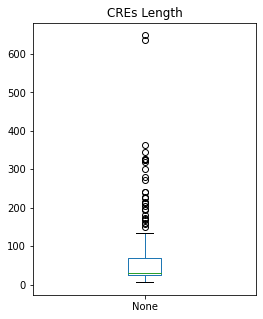

In [24]:
(kinases.cre_end - kinases.cre_start + 1).plot(kind='box', figsize= (4,5))
plt.title("CREs Length")
plt.xlabel("")
plt.show()

In [25]:
kinases_unique = kinases[['uniprot_acc', 'kd_start', 'kd_end']].drop_duplicates()

In [26]:
#Length of KDs
(kinases_unique.kd_end - kinases_unique.kd_start + 1).describe()

count    286.000000
mean     264.555944
std       18.109085
min      245.000000
25%      257.000000
50%      259.000000
75%      263.000000
max      363.000000
dtype: float64

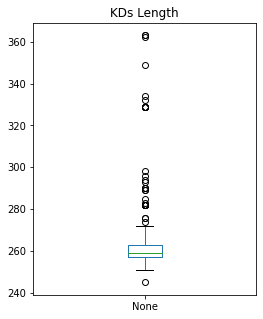

In [27]:
(kinases_unique.kd_end - kinases_unique.kd_start + 1).plot(kind='box', figsize= (4,5))
plt.title("KDs Length")
plt.xlabel("")
plt.show()

In [28]:
kinases_b = kinases[['uniprot_acc', 'cre_start', 'cre_end', 'kd_start', 'kd_end']].drop_duplicates() #, 'pdb_id'

In [29]:
kinases_b

,uniprot_acc,cre_start,cre_end,kd_start,kd_end
0,A0A2I0BVG8,346,353,56,325
1,A0A509AFG4,385,393,110,365
2,A0A509AHB6,345,352,57,324
3,A0A509AKL0,1,33,545,802
4,A0A509AQE6,394,402,118,372
...,...,...,...,...,...
297,Q9ZSA4,295,325,28,290
298,Q9ZUZ2,409,439,143,405
299,Q9ZV15,398,428,134,392
300,W0LYS5,287,327,31,287


In [ ]:
xx = kinases_b.merge(pdb_uniprot_kinases).drop_duplicates() #, how= 'left'
xx

,uniprot_acc,cre_start,cre_end,kd_start,kd_end,pdb,chain,start,end
0,A5K0N4,1,22,534,791,4rz7,A,1,13
1,A5K0N4,1,22,534,791,4rz7,A,20,101
2,A5K0N4,1,22,534,791,4rz7,A,104,134
3,A5K0N4,1,22,534,791,4rz7,A,136,543
4,A5K0N4,1,22,534,791,4rz7,A,546,571
...,...,...,...,...,...,...,...,...,...
9549,Q9Y243,17,147,148,405,2x18,D,4,118
9550,Q9Y243,17,147,148,405,2x18,E,3,118
9551,Q9Y243,17,147,148,405,2x18,F,3,113
9552,Q9Y243,17,147,148,405,2x18,G,4,118


In [ ]:
xx.uniprot_acc.nunique()

108

In [ ]:
xx.duplicated().any()

False

In [ ]:
# Control
#kinases_b[kinases_b.uniprot_acc.duplicated()]

In [ ]:
# kinases_b[kinases_b.uniprot_acc == 'Q62120'] # 4

In [ ]:
#pdb_uniprot_kinases[pdb_uniprot_kinases.uniprot_acc == 'Q62120'] # 15

In [ ]:
# Control
#xx[xx.uniprot_acc == 'Q62120'] # 4 * 15 = 60, ok!

# First: overlap between KD and PDB

In [31]:
kd = kinases_b[['uniprot_acc', 'kd_start', 'kd_end']].rename(columns= {
    'uniprot_acc': 'Chromosome',
    'kd_start': 'Start',
    'kd_end': 'End'
})

In [32]:
# Add an unique id for each kinase domain
kd["id_kd"] = range(1, len(kd)+1)

In [33]:
# As pyranges object
kd = pr.PyRanges(kd)

In [51]:
pdb = pdb_uniprot_kinases[['uniprot_acc', 'start', 'end', 'id_pdb']].rename(columns={
    'uniprot_acc': 'Chromosome'
})
pdb.columns = pdb.columns.str.capitalize()

In [52]:
pdb.duplicated().any()

False

In [53]:
pdb = pr.PyRanges(pdb)

In [38]:
# Count number of overlaps and their fraction per interval.
kd.coverage(pdb, overlap_col= "Count", fraction_col= "Fraction")

,Chromosome,Start,End,id_kd,Count,Fraction
0,A0A2I0BVG8,56,325,1,0,0.0
1,A0A5K1K8H0,125,379,6,0,0.0
2,A0A509AFG4,110,365,2,0,0.0
3,A0A509AHB6,57,324,3,0,0.0
4,A0A509AKL0,545,802,4,0,0.0
...,...,...,...,...,...,...
288,Q95266,14,272,249,0,0.0
289,Q99558,400,655,253,36,1.0
290,Q99683,680,938,254,161,1.0
291,W0LYS5,31,287,292,0,0.0


In [39]:
pdb_overlap = pdb.coverage(kd, overlap_col= "Count", fraction_col= "Fraction")

c:\Users\User\AppData\Local\Programs\Python\Python37\lib\site-packages\pyranges\methods\coverage.py:69: RuntimeWarning: invalid value encountered in true_divide
  _lengths = _lengths /  (ends - starts)


In [40]:
pdb_overlap[pdb_overlap.Count > 0]

,Chromosome,Start,End,Id_pdb,Count,Fraction
0,A5K0N4,136,543,237,1,0.022113
1,A5K0N4,546,571,238,1,1.000000
2,A5K0N4,576,815,239,1,0.899582
3,A5K0N4,463,543,285,1,0.112500
4,A5K0N4,545,603,286,1,1.000000
...,...,...,...,...,...,...
6501,Q99683,834,939,8395,1,0.990476
6502,Q99683,671,712,8396,1,0.780488
6503,Q99683,720,829,8397,1,1.000000
6504,Q99683,840,853,8398,1,1.000000


In [41]:
# With slack 1, bookended features are joined
kd = pdb.join(kd, strandedness=False, slack=1)#.drop(like="_b")
kd

,Chromosome,Start,End,Id_pdb,Start_b,End_b,id_kd
0,A5K0N4,136,543,237,534,791,10
1,A5K0N4,546,571,238,534,791,10
2,A5K0N4,576,815,239,534,791,10
3,A5K0N4,463,543,285,534,791,10
4,A5K0N4,545,603,286,534,791,10
...,...,...,...,...,...,...,...
7082,Q99683,834,939,8395,680,938,254
7083,Q99683,671,712,8396,680,938,254
7084,Q99683,720,829,8397,680,938,254
7085,Q99683,840,853,8398,680,938,254


In [42]:
# COntrol
pdb_uniprot_kinases[pdb_uniprot_kinases.uniprot_acc == 'Q99683']

,pdb,chain,uniprot_acc,start,end,id_pdb
31786,5v19,A,Q99683,671,714,345
31787,5v19,A,Q99683,721,829,346
31788,5v19,A,Q99683,838,883,347
31789,5v19,A,Q99683,889,939,348
31790,5v19,B,Q99683,670,714,349
...,...,...,...,...,...,...
943005,6e2m,A,Q99683,834,939,8395
943006,6e2m,B,Q99683,671,712,8396
943007,6e2m,B,Q99683,720,829,8397
943008,6e2m,B,Q99683,840,853,8398


In [43]:
# control
kinases_b[kinases_b.uniprot_acc == 'Q99683']

,uniprot_acc,cre_start,cre_end,kd_start,kd_end
262,Q99683,1,648,680,938


In [44]:
kd[kd.Chromosome == 'Q99683']

,Chromosome,Start,End,Id_pdb,Start_b,End_b,id_kd
0,Q99683,671,714,345,680,938,254
1,Q99683,721,829,346,680,938,254
2,Q99683,838,883,347,680,938,254
3,Q99683,889,939,348,680,938,254
4,Q99683,670,714,349,680,938,254
...,...,...,...,...,...,...,...
156,Q99683,834,939,8395,680,938,254
157,Q99683,671,712,8396,680,938,254
158,Q99683,720,829,8397,680,938,254
159,Q99683,840,853,8398,680,938,254


---

In [45]:
# Table with unique CREs
cre = kinases_b[['uniprot_acc', 'cre_start', 'cre_end']].rename(columns= {
    'uniprot_acc': 'Chromosome',
    'cre_start': 'Start',
    'cre_end': 'End'
}).drop_duplicates()
cre["id_cre"] = range(1, len(cre)+1)

In [47]:
cre = pr.PyRanges(cre)

In [54]:
pdb

,Chromosome,Start,End,Id_pdb
0,A5K0N4,1,13,234
1,A5K0N4,20,101,235
2,A5K0N4,104,134,236
3,A5K0N4,136,543,237
4,A5K0N4,546,571,238
...,...,...,...,...
8603,Q99683,834,939,8395
8604,Q99683,671,712,8396
8605,Q99683,720,829,8397
8606,Q99683,840,853,8398


In [48]:
cre = pdb.join(cre, strandedness=False, slack=1)
cre

,Chromosome,Start,End,Id_pdb,Start_b,End_b,id_cre
0,A5K0N4,1,13,234,1,22,10
1,A5K0N4,20,101,235,1,22,10
2,A5K0N4,1,5,281,1,22,10
3,A5K0N4,8,13,282,1,22,10
4,A5K0N4,20,318,283,1,22,10
...,...,...,...,...,...,...,...
1842,Q99683,532,655,6679,1,648,247
1843,Q99683,272,340,6680,1,648,247
1844,Q99683,342,382,6681,1,648,247
1845,Q99683,385,526,6682,1,648,247


de ambas tablas, quedarme con los PDB que contengan ambos: KD y CRE

In [55]:
cre = cre.as_df()
kd = kd.as_df()

In [56]:
cre = cre.rename(columns= {'Chromosome': 'uniprot_acc'})
cre.columns = cre.columns.str.lower()
cre

,uniprot_acc,start,end,id_pdb,start_b,end_b,id_cre
0,A5K0N4,1,13,234,1,22,10
1,A5K0N4,20,101,235,1,22,10
2,A5K0N4,1,5,281,1,22,10
3,A5K0N4,8,13,282,1,22,10
4,A5K0N4,20,318,283,1,22,10
...,...,...,...,...,...,...,...
1842,Q99683,532,655,6679,1,648,247
1843,Q99683,272,340,6680,1,648,247
1844,Q99683,342,382,6681,1,648,247
1845,Q99683,385,526,6682,1,648,247


In [57]:
kd = kd.rename(columns= {'Chromosome': 'uniprot_acc'})
kd.columns = kd.columns.str.lower()
kd

,uniprot_acc,start,end,id_pdb,start_b,end_b,id_kd
0,A5K0N4,136,543,237,534,791,10
1,A5K0N4,546,571,238,534,791,10
2,A5K0N4,576,815,239,534,791,10
3,A5K0N4,463,543,285,534,791,10
4,A5K0N4,545,603,286,534,791,10
...,...,...,...,...,...,...,...
7082,Q99683,834,939,8395,680,938,254
7083,Q99683,671,712,8396,680,938,254
7084,Q99683,720,829,8397,680,938,254
7085,Q99683,840,853,8398,680,938,254


In [58]:
cre_ = cre[['uniprot_acc', 'id_pdb', 'id_cre']]
kd_ = kd[['uniprot_acc', 'id_pdb', 'id_kd']]

In [60]:
cre_.uniprot_acc.nunique()

70

In [61]:
kd_.uniprot_acc.nunique()

90

In [59]:
pdbs_kd_cre = cre_.merge(kd_)
pdbs_kd_cre

,uniprot_acc,id_pdb,id_cre,id_kd
0,A5K0N4,5147,10,10
1,O74536,8034,21,21
2,O74536,8035,21,21
3,O75582,579,22,23
4,O75582,582,22,23
...,...,...,...,...
1532,Q16644,2845,142,147
1533,Q16644,5339,142,147
1534,Q61846,1754,178,183
1535,Q61846,7063,178,183


In [65]:
pdbs_kd_cre.duplicated().any()

False

In [66]:
# How many proteins with PDBs including both regions (CRE and KD)?
pdbs_kd_cre.uniprot_acc.nunique()

42

In [64]:
pdbs_kd_cre.id_pdb.nunique()

1324

In [67]:
mapping = pdb_uniprot_kinases[pdb_uniprot_kinases.id_pdb.isin(pdbs_kd_cre.id_pdb.unique())]
mapping

,pdb,chain,uniprot_acc,start,end,id_pdb
1044,1gzo,A,P31751,146,188,2
1986,1m17,A,P00533,696,988,8
2347,1o6l,A,P31751,146,449,12
4759,2a2a,A,Q9UIK4,11,314,20
4760,2a2a,B,Q9UIK4,12,314,21
...,...,...,...,...,...,...
964407,7jxl,D,P00533,877,1007,8542
973506,4i21,A,P00533,703,987,8561
973508,4i21,B,P00533,703,993,8563
977455,7up8,A,O75582,631,723,8604


In [68]:
# This table contains PDBs with both regions: KDs and CREs
pdbs_kd_cre = pdbs_kd_cre.merge(mapping[['pdb', 'id_pdb']])
pdbs_kd_cre

,uniprot_acc,id_pdb,id_cre,id_kd,pdb
0,A5K0N4,5147,10,10,5fet
1,O74536,8034,21,21,3h4j
2,O74536,8035,21,21,3h4j
3,O75582,579,22,23,3kn5
4,O75582,582,22,23,3kn5
...,...,...,...,...,...
1532,Q16644,2845,142,147,3fhr
1533,Q16644,5339,142,147,7nrb
1534,Q61846,1754,178,183,4bfm
1535,Q61846,7063,178,183,4cqg


In [69]:
# How many unique of these PDBs?
pdbs_kd_cre.pdb.nunique()

785

In [ ]:
#pdbs_kd_cre.to_csv('../datasets/pdbs_kd_cre.tsv', sep= '\t', index= False)

In [51]:
# check
pdb_uniprot_kinases[pdb_uniprot_kinases.id_pdb == 8034]

,pdb,chain,uniprot_acc,start,end,id_pdb
915732,3h4j,A,O74536,248,351,8034


In [52]:
kinases[kinases.uniprot_acc == 'O74536']

,uniprot_acc,organism,cre_start,cre_end,cre_(s_or_d),length,kd_start,kd_end,pdb_id,pdb_res_(å),af,status
21,O74536,S. pombe,305,351,S,NaN,34,285,3H4J,2.80,AF-O74536-F1,known


---

In [80]:
pdb_uniprot_unique = pdb_uniprot_kinases[['pdb', 'uniprot_acc']].drop_duplicates()
pdb_uniprot_unique

,pdb,uniprot_acc
965,1gag,P06213
1044,1gzo,P31751
1234,1i35,P28829
1237,1i44,P06213
1986,1m17,P00533
...,...,...
975682,7sz7,P00533
976383,7urz,Q13554
976469,7pg4,P06213
976493,7pg3,P06213


In [82]:
# Distribution of pdbs per uniprot
distrib = pdb_uniprot_unique.groupby("uniprot_acc")[['pdb']].size().sort_values()
distrib

uniprot_acc
Q9Y243      1
Q6PHZ2      1
P08413      1
Q61036      1
Q5EG47      1
         ... 
P15056    101
P28482    123
P00523    133
O14757    154
P00533    262
Length: 108, dtype: int64

(array([73., 11., 10.,  2.,  5.,  2.,  0.,  1.,  0.,  1.,  1.,  1.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  1.]),
 array([  1.  ,  14.05,  27.1 ,  40.15,  53.2 ,  66.25,  79.3 ,  92.35,
        105.4 , 118.45, 131.5 , 144.55, 157.6 , 170.65, 183.7 , 196.75,
        209.8 , 222.85, 235.9 , 248.95, 262.  ]),
 <BarContainer object of 20 artists>)

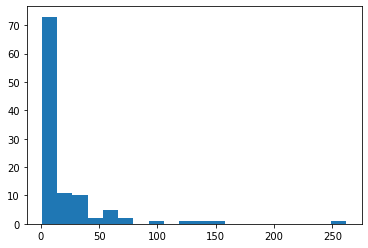

In [84]:
plt.hist(distrib, bins= 20)

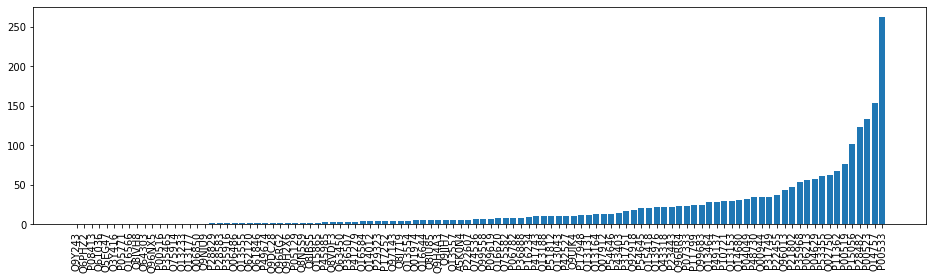

In [93]:
plt.figure(figsize= (16,4))
plt.bar(height= distrib, x= distrib.index)
plt.xticks(rotation=90)
plt.show()